<a href="https://colab.research.google.com/github/skku-kdj/MLRobustness_eval/blob/main/art/attack/evasion/blackbox/HopSkipJump.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load 5 pretrained model

In [ ]:
import torch
import os
import numpy as np
from numpy import asarray
import torch.nn as nn
import torch.optim as optim

from torchvision.models import vgg16
from torchvision.models import resnet50
from torchvision.models import densenet121
from torchvision.models import googlenet
from torchvision.models import alexnet

from PIL import Image
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [ ]:
model_vgg = vgg16(pretrained=True)
model_vgg.eval()
model_vgg.to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:03<00:00, 158MB/s]


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
model_resnet = resnet50(pretrained=True)
model_resnet.eval()
model_resnet.to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 169MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
model_densenet = densenet121(pretrained=True)
model_densenet.eval()
model_densenet.to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth
100%|██████████| 30.8M/30.8M [00:00<00:00, 141MB/s]


DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [ ]:
model_googlenet = googlenet(pretrained=True)
model_googlenet.eval()
model_googlenet.to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=GoogLeNet_Weights.IMAGENET1K_V1`. You can also use `weights=GoogLeNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/googlenet-1378be20.pth" to /root/.cache/torch/hub/checkpoints/googlenet-1378be20.pth
100%|██████████| 49.7M/49.7M [00:00<00:00, 150MB/s]


GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track

In [ ]:
model_alexnet = alexnet(pretrained=True)
model_alexnet.eval()
model_alexnet.to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:01<00:00, 192MB/s]


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/Colab_Notebooks/data')

Mounted at /content/drive


In [ ]:
with open("imagenet-classes.txt") as f:
  classes = [line.strip() for line in f.readlines()]
len(classes)

1000

In [ ]:
transform = transforms.Compose([
  transforms.Resize(256),
  transforms.CenterCrop(224),
  transforms.ToTensor(),
  transforms.Normalize(
    mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [ ]:
os.listdir()

['imagenet-classes.txt',
 'double_bass.jpg',
 'truck.jpg',
 'cat.jpg',
 'lobster.jpg',
 'kiwi.jpg',
 'otter.jpg',
 'ambulance.jpg',
 'key.jpg',
 'keyboard.jpg',
 'keyboard2.jpg']

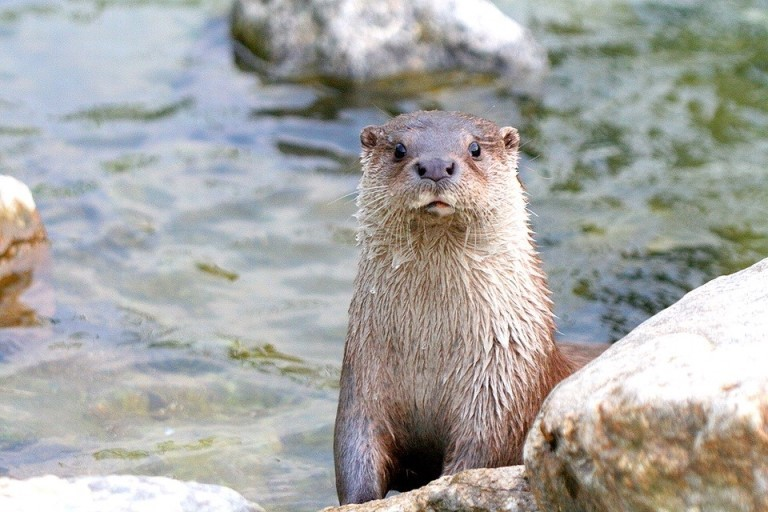

In [ ]:
image = Image.open("otter.jpg")
image

In [ ]:
batch = torch.unsqueeze(transform(image), 0)
batch = batch.to(device)
batch.shape

torch.Size([1, 3, 224, 224])

In [ ]:
output_vgg = model_vgg(batch)
output_resnet = model_resnet(batch)
output_densenet = model_densenet(batch)
output_googlenet = model_googlenet(batch)
output_alexnet = model_alexnet(batch)

In [ ]:
def print_top5(output):
  _, indices = torch.sort(output, descending=True)
  percentage = torch.nn.functional.softmax(output, dim=1)[0] * 100
  print([(classes[idx], percentage[idx].item()) for idx in indices[0][:5]])

In [ ]:
print("VGG16")
print_top5(output_vgg)
print("ResNet50")
print_top5(output_resnet)
print("DenseNet121")
print_top5(output_densenet)
print("GoogleNet")
print_top5(output_googlenet)
print("AlexNet")
print_top5(output_alexnet)

VGG16
[('otter', 95.39656066894531), ('weasel', 3.129242420196533), ('mink', 1.3232696056365967), ('marmot', 0.05951235815882683), ('polecat, fitch, foulmart, foumart, Mustela putorius', 0.039570197463035583)]
ResNet50
[('otter', 90.1373291015625), ('mink', 6.255505084991455), ('weasel', 2.944469451904297), ('polecat, fitch, foulmart, foumart, Mustela putorius', 0.2167041152715683), ('beaver', 0.16924449801445007)]
DenseNet121
[('otter', 83.82138061523438), ('weasel', 7.2602152824401855), ('mink', 6.862881660461426), ('polecat, fitch, foulmart, foumart, Mustela putorius', 1.0420632362365723), ('black-footed ferret, ferret, Mustela nigripes', 0.504519522190094)]
GoogleNet
[('otter', 59.090328216552734), ('marmot', 19.68470001220703), ('beaver', 4.682328701019287), ('mink', 3.6509525775909424), ('weasel', 1.035818099975586)]
AlexNet
[('otter', 77.83444213867188), ('mink', 15.944223403930664), ('marmot', 4.020036220550537), ('weasel', 2.0291965007781982), ('beaver', 0.11916609108448029)]


#HopSkipJump attack

In [ ]:
!pip install adversarial-robustness-toolbox

In [ ]:
from art.attacks.evasion import HopSkipJump
from art.estimators.classification import BlackBoxClassifier
from art.utils import to_categorical

In [ ]:
def predict(x):
  model = vgg16(pretrained=True)
  model.eval()
  model.to(device)
  x = torch.from_numpy(x).float()
  with torch.no_grad():
    outputs = model(x.to(device))
    _, predicted = torch.max(outputs.data, 1)

  y = torch.nn.functional.one_hot(predicted, num_classes=1000)
  y = y.cpu().numpy()
  return y

In [ ]:
classifier = BlackBoxClassifier(predict, input_shape=(3, 224, 224), nb_classes=1000)

##untargeted

In [ ]:
attack = HopSkipJump(classifier=classifier, targeted=False, max_iter=0, max_eval=1000, init_eval=10)
iter_step = 10
x_adv = None

task takes more than 40 min

In [ ]:
image_tensor = transform(image).unsqueeze(0)
image_numpy = image_tensor.numpy()

In [ ]:
def GetPredictions(adv_image_numpy):
  adv_tensor = torch.from_numpy(adv_image_numpy).to(device)
  adv_output_vgg = model_vgg(adv_tensor)
  adv_output_resnet = model_resnet(adv_tensor)
  adv_output_densenet = model_densenet(adv_tensor)
  adv_output_googlenet = model_googlenet(adv_tensor)
  adv_output_alexnet = model_alexnet(adv_tensor)
  print("VGG16")
  print_top5(adv_output_vgg)
  print("ResNet50")
  print_top5(adv_output_resnet)
  print("DenseNet121")
  print_top5(adv_output_densenet)
  print("GoogleNet")
  print_top5(adv_output_googlenet)
  print("AlexNet")
  print_top5(adv_output_alexnet)

In [ ]:
for i in range(10):
  x_adv = attack.generate(x=image_numpy, x_adv_init=x_adv, resume=True)
  print("Adversarial image at step %d." % (i * iter_step), "L2 error",
          np.linalg.norm(np.reshape(x_adv[0] - image_numpy, [-1])))
  plt.imshow(numpy_to_img(x_adv))
  plt.show()
  print(GetPredictions(x_adv))

  attack.max_iter = iter_step

HopSkipJump:   0%|          | 0/1 [00:00<?, ?it/s]

Adversarial image at step 0. L2 error 83.87713


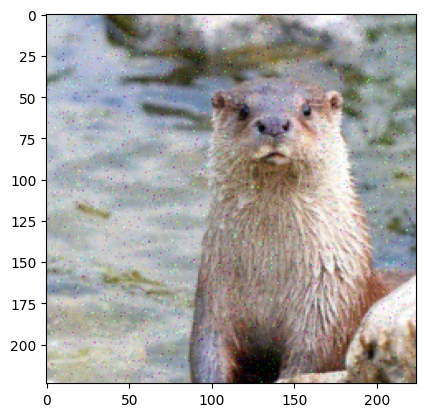

VGG16
[('beaver', 63.56288146972656), ('marmot', 18.340465545654297), ('otter', 11.401806831359863), ('mink', 4.826170921325684), ('weasel', 1.670028805732727)]
ResNet50
[('otter', 94.9994888305664), ('mink', 2.9884836673736572), ('weasel', 1.5348238945007324), ('beaver', 0.1888963282108307), ('marmot', 0.17403008043766022)]
DenseNet121
[('otter', 68.14969635009766), ('weasel', 16.759117126464844), ('mink', 11.406086921691895), ('beaver', 1.6933050155639648), ('marmot', 0.7309255003929138)]
GoogleNet
[('otter', 41.105289459228516), ('marmot', 39.34613037109375), ('beaver', 6.392754554748535), ('mink', 3.8973491191864014), ('ice bear, polar bear, Ursus Maritimus, Thalarctos maritimus', 0.5288387537002563)]
AlexNet
[('otter', 43.07406997680664), ('marmot', 36.792362213134766), ('mink', 16.085599899291992), ('weasel', 2.133835554122925), ('beaver', 1.0174927711486816)]
None


HopSkipJump:   0%|          | 0/1 [00:00<?, ?it/s]

Adversarial image at step 10. L2 error 64.13168


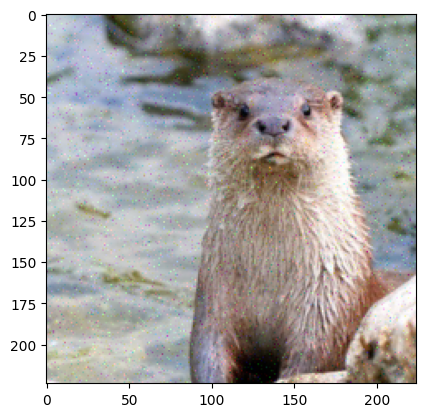

VGG16
[('marmot', 45.755836486816406), ('otter', 26.285594940185547), ('mink', 15.211396217346191), ('weasel', 8.637371063232422), ('beaver', 3.7799789905548096)]
ResNet50
[('otter', 85.47566986083984), ('mink', 8.965161323547363), ('weasel', 4.155829429626465), ('beaver', 0.49957841634750366), ('marmot', 0.40924903750419617)]
DenseNet121
[('otter', 87.57454681396484), ('mink', 5.012691020965576), ('weasel', 4.598846435546875), ('beaver', 1.7176425457000732), ('marmot', 0.7896052002906799)]
GoogleNet
[('otter', 51.71714401245117), ('marmot', 27.881113052368164), ('beaver', 5.579957485198975), ('mink', 3.0691959857940674), ('ice bear, polar bear, Ursus Maritimus, Thalarctos maritimus', 0.7587735056877136)]
AlexNet
[('marmot', 45.83924865722656), ('otter', 34.63871765136719), ('mink', 16.570051193237305), ('weasel', 1.9916425943374634), ('beaver', 0.5310654640197754)]
None


HopSkipJump:   0%|          | 0/1 [00:00<?, ?it/s]

Adversarial image at step 20. L2 error 51.55844


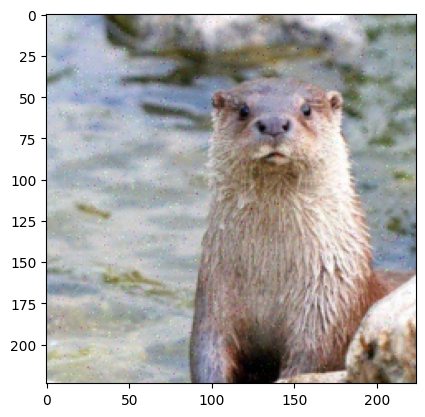

VGG16
[('marmot', 56.114723205566406), ('otter', 24.52920913696289), ('mink', 9.687801361083984), ('weasel', 6.0157976150512695), ('beaver', 3.4676129817962646)]
ResNet50
[('otter', 88.54782104492188), ('mink', 7.0668721199035645), ('weasel', 3.335111618041992), ('beaver', 0.44270554184913635), ('marmot', 0.19118532538414001)]
DenseNet121
[('otter', 81.99947357177734), ('weasel', 9.107699394226074), ('mink', 6.5997443199157715), ('beaver', 1.0013620853424072), ('marmot', 0.5749669671058655)]
GoogleNet
[('otter', 42.56074142456055), ('marmot', 30.713293075561523), ('beaver', 7.048484802246094), ('mink', 3.7159149646759033), ('weasel', 0.5587401986122131)]
AlexNet
[('otter', 64.52227783203125), ('mink', 18.274757385253906), ('marmot', 14.755436897277832), ('weasel', 1.9109044075012207), ('beaver', 0.33607423305511475)]
None


HopSkipJump:   0%|          | 0/1 [00:00<?, ?it/s]

Adversarial image at step 30. L2 error 43.86844


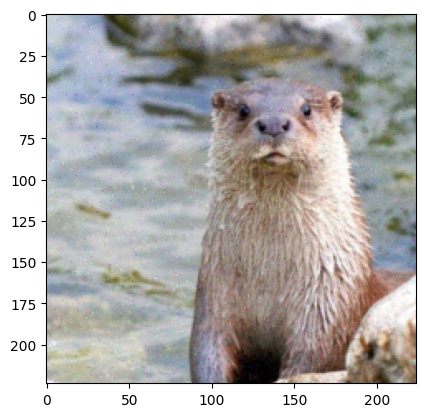

VGG16
[('marmot', 52.835716247558594), ('otter', 27.90120506286621), ('mink', 9.934791564941406), ('weasel', 7.897128105163574), ('beaver', 1.2677032947540283)]
ResNet50
[('otter', 91.9483871459961), ('mink', 4.910786151885986), ('weasel', 2.43080472946167), ('beaver', 0.3180858790874481), ('marmot', 0.13604071736335754)]
DenseNet121
[('otter', 81.67057037353516), ('weasel', 10.161996841430664), ('mink', 6.3438544273376465), ('beaver', 0.6207115650177002), ('marmot', 0.5297185778617859)]
GoogleNet
[('otter', 46.75840759277344), ('marmot', 32.64480972290039), ('beaver', 5.286978721618652), ('mink', 3.215575695037842), ('ice bear, polar bear, Ursus Maritimus, Thalarctos maritimus', 1.0849965810775757)]
AlexNet
[('otter', 57.773048400878906), ('marmot', 22.299551010131836), ('mink', 17.032041549682617), ('weasel', 2.4433815479278564), ('beaver', 0.22491878271102905)]
None


HopSkipJump:   0%|          | 0/1 [00:00<?, ?it/s]

Adversarial image at step 40. L2 error 40.74488


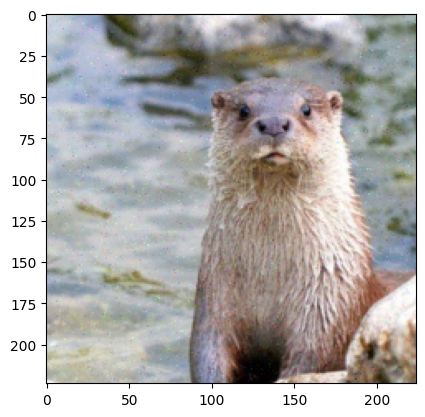

VGG16
[('marmot', 53.43992233276367), ('otter', 29.401138305664062), ('mink', 8.587725639343262), ('weasel', 7.115347862243652), ('beaver', 1.2202308177947998)]
ResNet50
[('otter', 89.45967864990234), ('mink', 6.071944236755371), ('weasel', 3.9754981994628906), ('black-footed ferret, ferret, Mustela nigripes', 0.13325658440589905), ('polecat, fitch, foulmart, foumart, Mustela putorius', 0.11802276223897934)]
DenseNet121
[('otter', 83.19692993164062), ('weasel', 8.826028823852539), ('mink', 6.675933837890625), ('polecat, fitch, foulmart, foumart, Mustela putorius', 0.4547426104545593), ('beaver', 0.3516516089439392)]
GoogleNet
[('otter', 61.665618896484375), ('marmot', 21.87578010559082), ('beaver', 4.079301357269287), ('mink', 3.0525412559509277), ('ice bear, polar bear, Ursus Maritimus, Thalarctos maritimus', 0.6731643080711365)]
AlexNet
[('otter', 75.02073669433594), ('mink', 13.237956047058105), ('marmot', 9.191079139709473), ('weasel', 2.342336416244507), ('beaver', 0.1189900785684

In [ ]:
mask = np.random.binomial(n=1, p=0.1, size=np.prod(image_numpy.shape))
mask = mask.reshape(image_numpy.shape)
x_adv = None

for i in range(10):
  x_adv = attack.generate(x=image_numpy, x_adv_init=x_adv, mask=mask)
  print("Adversarial image at step %d." % (i * iter_step), "L2 error",
          np.linalg.norm(np.reshape(x_adv[0] - image_numpy, [-1])))
  plt.imshow(numpy_to_img(x_adv))
  plt.show()
  print(GetPredictions(x_adv))

  attack.max_iter = iter_step

##targeted

In [ ]:
init_image = Image.open("ambulance.jpg")
init_image

In [ ]:
init_image_tensor = transform(init_image).unsqueeze(0)
init_image_numpy = init_image_tensor.numpy()

In [ ]:
attack = HopSkipJump(classifier=classifier, targeted=True, max_iter=0, max_eval=1000, init_eval=10)
iter_step = 10

x_adv = init_image_numpy

task takes more than an hour

In [ ]:
for i in range(15):
  x_adv = attack.generate(x=image_numpy, y=to_categorical([407], 1000), x_adv_init=x_adv, resume=True)
  print("Adversarial image at step %d." % (i * iter_step), "L2 error",
          np.linalg.norm(np.reshape(x_adv[0] - image_numpy, [-1])))
  plt.imshow(numpy_to_img(x_adv))
  plt.show()
  print(GetPredictions(x_adv))

  attack.max_iter = iter_step